In [1]:
import numpy as np
from scipy import stats

N=10
a=np.random.randn(N)+2 #10个正态分布,mean是2
b=np.random.randn(N) #10个正态部分，mean是0
#a 和 b的方差都是1

var_a=a.var(ddof=1) #默认的是整体方差，我们需要样本方差，N-1,所以dof=1
#https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.var.html
#ddof : int, optional
#“Delta Degrees of Freedom”: the divisor used in the calculation is N -
#ddof, where N represents the number of elements. By default ddof is zero.

var_b=b.var(ddof=1)

s=np.sqrt((var_a+var_b)/2)

t=(a.mean()-b.mean())/(s*np.sqrt(2/N))

df=2*N-2

#the degrees of freedom for this test is N1+N2 − 2 where n is the number of participants in each group.
p1=1-stats.t.cdf(t,df=df) ## 返回t(n)的概率密度函数在负无穷到x上的积分，也就是概率分布函数的值
#p1(T>=t)=1-p(T<=t)
#becasue it is a two tail analysis
print ("t:\t",t,"p:\t",2*p1)


t2,p2=stats.ttest_ind(a,b)
print("t2:\t",t2,"p2:\t",p2)

#https://blog.csdn.net/m0_37777649/article/details/74938120

t:	 5.983789749729437 p:	 1.1650601670964988e-05
t2:	 5.983789749729436 p2:	 1.165060167099302e-05


In [6]:
import numpy as np
import pandas as pd
from scipy import stats

# get data
df = pd.read_csv('advertisement_clicks.csv')
a = df[df['advertisement_id'] == 'A']
b = df[df['advertisement_id'] == 'B']
a = a['action']
b = b['action']

print("a.mean:", a.mean())
print("b.mean:", b.mean())

#scipy.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')

# built-in t-test:
t, p = stats.ttest_ind(a, b)
print("""Variance Equal But Not Know""")
print("t:\t", t, "p:\t", p)

#Calculate the T-test for the means of two independent samples of scores.
#This is a two-sided test for the null hypothesis that 2 independent samples 
#have identical average (expected) values. This test assumes that the populations have identical variances by default.

# welch's t-test: Unqueal variances
t1, p1 = stats.ttest_ind(a, b, equal_var=False)
print("""Welch's t-test""")
print("t:\t", t1, "p:\t", p1)

# welch's t-test manual:
N1 = len(a)
s1_sq = a.var()
N2 = len(b)
s2_sq = b.var()
t3 = (a.mean() - b.mean()) / np.sqrt(s1_sq / N1 + s2_sq / N2)

nu1 = N1 - 1
nu2 = N2 - 1
df = (s1_sq / N1 + s2_sq / N2)**2 / ( (s1_sq*s1_sq) / (N1*N1 * nu1) + (s2_sq*s2_sq) / (N2*N2 * nu2) )
p3 = (1 - stats.t.cdf(np.abs(t), df=df))*2
print("""Manual Welch t-test""")
print("t:\t", t3, "p:\t", p3)

a.mean: 0.304
b.mean: 0.372
Variance Equal But Not Know
t:	 -3.2211732138019786 p:	 0.0012971905467125246
Welch's t-test
t:	 -3.2211732138019786 p:	 0.0012972410374001632
Manual Welch t-test
t:	 -3.221173213801983 p:	 0.001297241037400143


In [1]:
#Chi Square Exceise
#Pearson's chi-squared test
#Determine wether the click-trouhg rate are significate diffrence 
#https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.chi2_contingency.html#scipy-stats-chi2-contingency

import numpy as np
import pandas as pd
from scipy import stats

def get_p_value(T):
  # same as scipy.stats.chi2_contingency(T, correction=False)
  det = T[0,0]*T[1,1] - T[0,1]*T[1,0]
  c2 = (det**2)*T.sum() / (T[0].sum() *  T[1].sum() *  T[:,0].sum() * T[:,1].sum())
  p = 1 - stats.chi2.cdf(x=c2, df=1)
  return p


# contingency table
#        click       no click
#------------------------------
# ad A |   a            b
# ad B |   c            d

# get data
df = pd.read_csv('advertisement_clicks.csv')
a = df[df['advertisement_id'] == 'A']
b = df[df['advertisement_id'] == 'B']
a = a['action']
b = b['action']

A_clk = a.sum()
A_noclk = a.size - a.sum()
B_clk = b.sum()
B_noclk = b.size - b.sum()

T = np.array([[A_clk, A_noclk], [B_clk, B_noclk]])

#P-value
print(get_p_value(T))

chi2, p2, dof, ex=stats.chi2_contingency(observed=T,correction=False)
#if Set as True, it use Yates's correction for continuity
#https://en.wikipedia.org/wiki/Yates%27s_correction_for_continuity
print("chi2:\t", chi2)
print("p-value:\t", p2)
print("degree of freedom:\t",dof)


0.0013069502732125926
chi2:	 10.332683816299898
p-value:	 0.0013069502732125406
degree of freedom:	 1


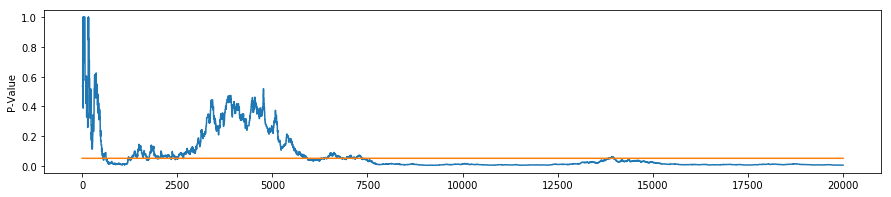

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, chi2_contingency

# contingency table
#        click       no click
#------------------------------
# ad A |   a            b
# ad B |   c            d
#
# chi^2 = (ad - bc)^2 (a + b + c + d) / [ (a + b)(c + d)(a + c)(b + d)]
# degrees of freedom = (#cols - 1) x (#rows - 1) = (2 - 1)(2 - 1) = 1

# short example

# T = np.array([[36, 14], [30, 25]])
# c2 = np.linalg.det(T)**2 * T.sum() / ( T[0].sum()*T[1].sum()*T[:,0].sum()*T[:,1].sum() )
# p_value = 1 - chi2.cdf(x=c2, df=1)

# equivalent:
# (36-31.429)**2/31.429+(14-18.571)**2/18.571 + (30-34.571)**2/34.571 + (25-20.429)**2/20.429


class DataGenerator:
  def __init__(self, p1, p2):
    self.p1 = p1
    self.p2 = p2
    
 #P1 P2 is a click rate for group 1 and gourp 2   

  def next(self):
    click1 = 1 if (np.random.random() < self.p1) else 0 #每个一个人进来，如果这个random小于p，就是不click
    click2 = 1 if (np.random.random() < self.p2) else 0
    return click1, click2

def get_p_value(T):
    p=chi2_contingency(T, correction=False)[1]
    return p

def run_experiment(p1, p2, N):
  data = DataGenerator(p1, p2)
  p_values = np.empty(N) #创造一个2000个的空array来存储p-value
  T = np.zeros((2, 2)).astype(np.float32)
  for i in range(N):
    c1, c2 = data.next()
    T[0,c1] += 1
    T[1,c2] += 1
    # ignore the first 10 values
    if i < 10:
      p_values[i] = None
    else:
      p_values[i] = get_p_value(T)
  plt.figure(figsize=(15,3))
  plt.plot(p_values)
  plt.plot(np.ones(N)*0.05)
  #Return a new array of given shape and type, filled with ones, 2000个1，都乘以0.05
  plt.ylabel('P-Value')
  plt.show()

run_experiment(0.1, 0.11, 20000)